# Q-Learning


In [2]:
%pip install gym
%pip install numpy
%pip install matplotlib
%pip install pygame

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import gym
import numpy as np
import time
import matplotlib.pyplot as plt

### Idea
Armar una Q-Tabla de (ESTADOS x ACCIONES_POSIBLES) a partir de la exploracion del entorno donde
> Q[s, a] = INMEDIATE REWARD + FUTURE VALUE

Cada vez que estoy en uno estado de la tabla, elijo la accion con el valor maximo.

#### Updating Q-Values
The formula for updating the Q-Table after each action is as follows:
> $ Q[state, action] = Q[state, action] + \alpha * (reward + \gamma * max(Q[newState, :]) - Q[state, action]) $

- $\alpha$ stands for the **Learning Rate**

- $\gamma$ stands for the **Discount Factor**

#### Learning Rate $\alpha$
The learning rate $\alpha$ is a numeric constant that defines how much change is permitted on each QTable update. A high learning rate means that each update will introduce a large change to the current state-action value. A small learning rate means that each update has a more subtle change. Modifying the learning rate will change how the agent explores the enviornment and how quickly it determines the final values in the QTable.

#### Discount Factor $\gamma$
Discount factor also know as gamma ($\gamma$) is used to balance how much focus is put on the current and future reward. A high discount factor means that future rewards will be considered more heavily.

## Cargo el entorno

In [4]:
env = gym.make('FrozenLake-v1', render_mode="rgb_array")

> Observacion: <br>
> En la nueva api de openAI, env.step(action) devolvia solo done, para evitar ambiguedades ahora devuelve:
> * Truncated: Episode truncating.
> * Terminated: Episode terminating. <br>

> Done = truncated OR terminated 

In [5]:
# flujo de ejecucion ~ ejemplo
# state, _ = env.reset()  # reset enviornment to default state
# action = env.action_space.sample() # get a random action 
# next_state, reward, terminated, truncated, info = env.step(action) # take action, notice it returns information about the action
# env.render()   # render the GUI for the enviornment 

## Inicializo la Q-table

In [6]:
STATES = env.observation_space.n # cantidad de estados posibles
ACTIONS = env.action_space.n # cantidad de acciones posibles
Q = np.zeros((STATES, ACTIONS))

## Entreno la Q-table

In [55]:
def train_q_table(Q, EPISODES, MAX_STEPS, LEARNING_RATE, GAMMA, RENDER, epsilon):

  # Entrena la Q-Tabla con los siguientes hiperparametros:

  # EPISODES: Cantidad de episodios
  # MAX_STEPS: Cantidad de pasos máximos por episodio
  # LEARNING_RATE: Tasa de aprendizaje
  # GAMMA: Factor de descuento
  # RENDER: Si se desea ver el entrenamiento
  # epsilon: Probabilidad de exploración

  rewards = []
  for episode in range(EPISODES):

    # estado inicial
    state, _ = env.reset()

    for _ in range(MAX_STEPS):
      
      if RENDER:
        # muestro en pantalla
        env.render()

      # elijo una accion, donde epsilon es la probabilidad de exploracion
      if np.random.uniform(0, 1) < epsilon:
        # accion aleatoria
        action = env.action_space.sample()  
      else:
        # accion segun la tabla Q
        action = np.argmax(Q[state, :])

      # ejecuto la accion y avanzo al siguiente estado
      next_state, reward, terminated, truncated, _ = env.step(action)
      done = terminated or truncated

      # actualizo la tabla Q
      Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

      # actualizo el estado
      state = next_state
      
      if done: 
        rewards.append(reward)
        epsilon -= 0.001
        break  # reached goal
      
  return rewards

In [63]:
EPISODES = 1500 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment
LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96
RENDER = False # if you want to see training set to true
epsilon = 0.9

rewards = train_q_table(Q, EPISODES, MAX_STEPS, LEARNING_RATE, GAMMA, RENDER, epsilon)
np.mean(rewards)

0.354

## Evaluando el progreso del reward 

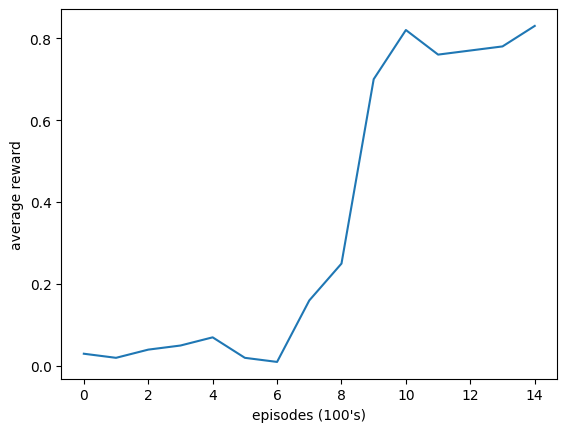

In [64]:
def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()

In [60]:
train_q_table(Q, 2, MAX_STEPS, LEARNING_RATE, GAMMA, True, epsilon)

[0.0, 0.0]

## Jugando

In [71]:
env = gym.make('FrozenLake-v1', render_mode="human")
state, _ = env.reset()
done = False
while not done:
    action = np.argmax(Q[state,:])
    state, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    env.render()
    time.sleep(0.5)

c:\Users\sebas\Proyectos\Reinforcement-Learning-Introduction\.venv\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
